# 타이타닉 데이터 EDA(exploratory data analysis)

https://www.kaggle.com/c/titanic

# 분석 패키지/모듈 불러오기

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

# 데이터 불러오기

In [2]:
df = pd.read_csv('./train.csv')

# 데이터 형태 파악

In [3]:
df.shape

(891, 12)

In [4]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

0. PassengerId : 승객번호

1. survived : 생존 유무(생존=1, 죽음=0)

2. pclass : 티켓 등급

3. name : 승객 이름

4. sex : 성별

5. age : 나이

6. sibsp : 동승자 수(형제 또는 배우자)

7. parch : 동승자 수(부모 또는 자녀)

8. ticket : 티켓 번호

9. far : 티켓 요금

10. cabin : 선실 번호

11. embarked : 탑승 장소(선착장)

In [6]:
df.info

<bound method DataFrame.info of      PassengerId  Survived  Pclass  \
0              1         0       3   
1              2         1       1   
2              3         1       3   
3              4         1       1   
4              5         0       3   
..           ...       ...     ...   
886          887         0       2   
887          888         1       1   
888          889         0       3   
889          890         1       1   
890          891         0       3   

                                                  Name     Sex   Age  SibSp  \
0                              Braund, Mr. Owen Harris    male  22.0      1   
1    Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                               Heikkinen, Miss. Laina  female  26.0      0   
3         Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                             Allen, Mr. William Henry    male  35.0      0   
..                                   

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [8]:
df.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

# 데이터 통계량

In [9]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [10]:
df.nunique()

PassengerId    891
Survived         2
Pclass           3
Name           891
Sex              2
Age             88
SibSp            7
Parch            7
Ticket         681
Fare           248
Cabin          147
Embarked         3
dtype: int64

In [11]:
df['Survived'].value_counts()

0    549
1    342
Name: Survived, dtype: int64

In [12]:
# 결측치
print(df.isnull().sum())

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


In [13]:
# 중복
df.duplicated().sum()
# df.drop_duplicates()

0

# 데이터 시각화(Visualization)

In [14]:
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

<AxesSubplot:xlabel='Pclass', ylabel='count'>

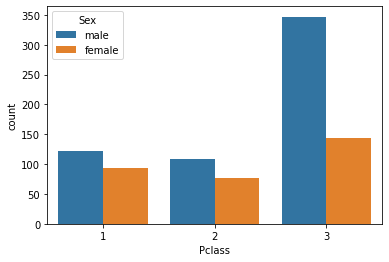

In [15]:
sns.countplot(data=df, x="Pclass", hue="Sex")

<AxesSubplot:xlabel='Pclass', ylabel='count'>

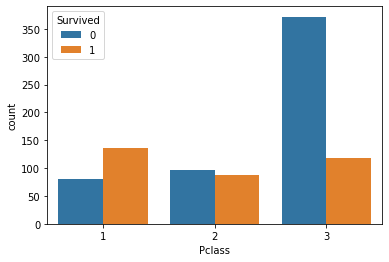

In [16]:
sns.countplot(data=df, x="Pclass", hue="Survived")

<AxesSubplot:xlabel='Pclass', ylabel='count'>

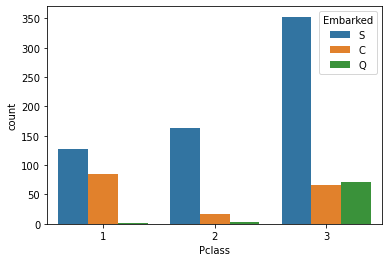

In [17]:
sns.countplot(data=df, x="Pclass", hue="Embarked")

In [18]:
df[['Age','Fare']].corr()

,Age,Fare
Age,1.000000,0.096067
Fare,0.096067,1.000000


<AxesSubplot:>

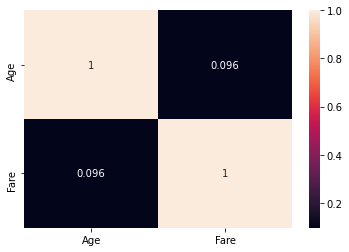

In [19]:
sns.heatmap(df[['Age','Fare']].corr(), annot=True)

<AxesSubplot:>

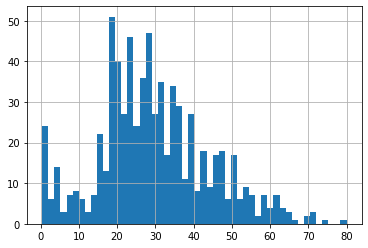

In [20]:
df['Age'].hist(bins=50)

<AxesSubplot:xlabel='Age', ylabel='Fare'>

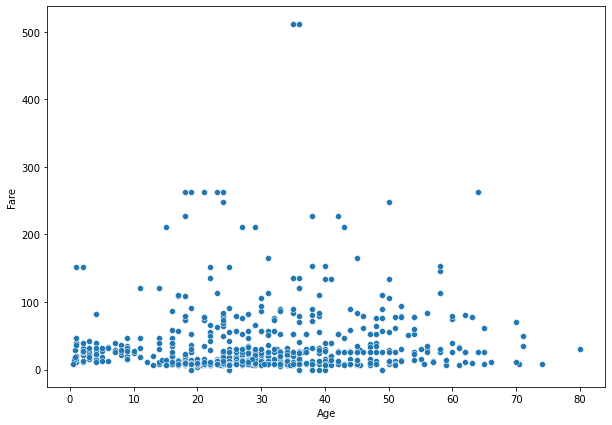

In [21]:
fig, ax = plt.subplots(figsize=(10,7))
sns.scatterplot(ax=ax, data=df, x='Age', y='Fare')

<AxesSubplot:xlabel='Age', ylabel='Fare'>

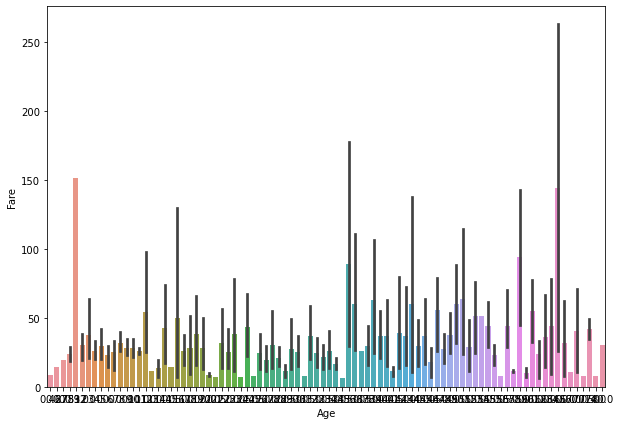

In [22]:
fig, ax = plt.subplots(figsize=(10,7))
sns.barplot(x=df['Age'], y=df.Fare)

<AxesSubplot:xlabel='Age', ylabel='Fare'>

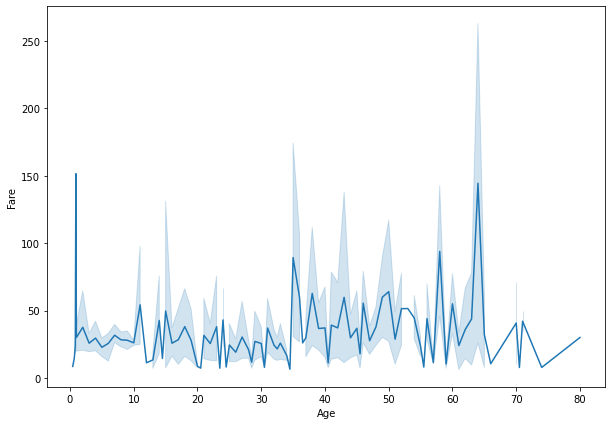

In [23]:
fig, ax = plt.subplots(figsize=(10,7))
sns.lineplot(x=df['Age'], y=df.Fare)

In [24]:
df2 = df.drop(columns='PassengerId', axis=1)

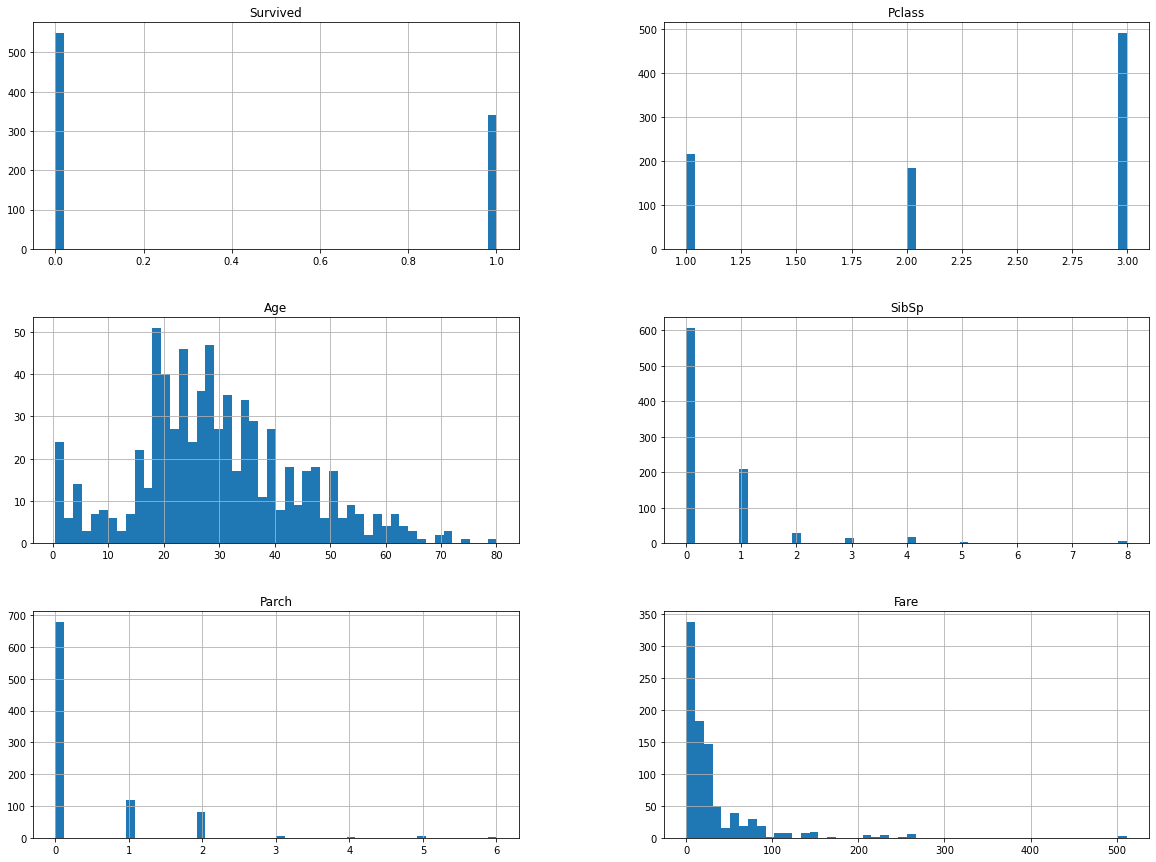

In [25]:
df2.hist(bins=50,figsize=(20,15))
plt.show()

count    714.000000
mean      29.699118
std       14.526497
min        0.420000
25%       20.125000
50%       28.000000
75%       38.000000
max       80.000000
Name: Age, dtype: float64


C:\Users\ultra\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


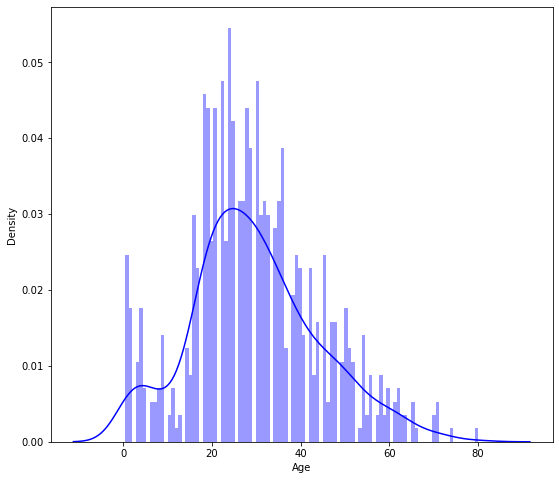

In [26]:
print(df['Age'].describe())
plt.figure(figsize = (9 , 8))
sns.distplot(df['Age'], color = 'b', bins = 100, hist_kws = {'alpha': 0.4});

count    891.000000
mean      32.204208
std       49.693429
min        0.000000
25%        7.910400
50%       14.454200
75%       31.000000
max      512.329200
Name: Fare, dtype: float64


C:\Users\ultra\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


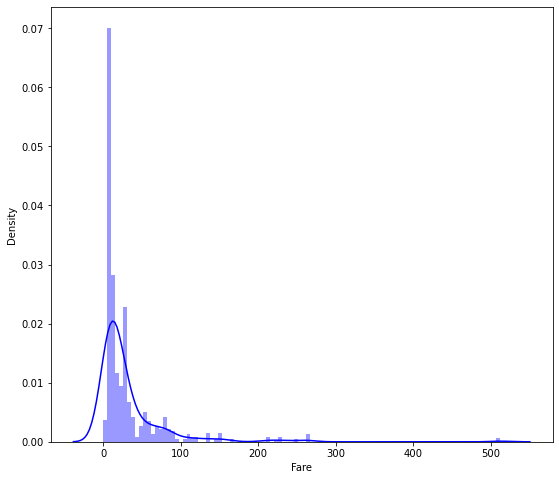

In [27]:
print(df['Fare'].describe())
plt.figure(figsize = (9 , 8))
sns.distplot(df['Fare'], color = 'b', bins = 100, hist_kws = {'alpha': 0.4});

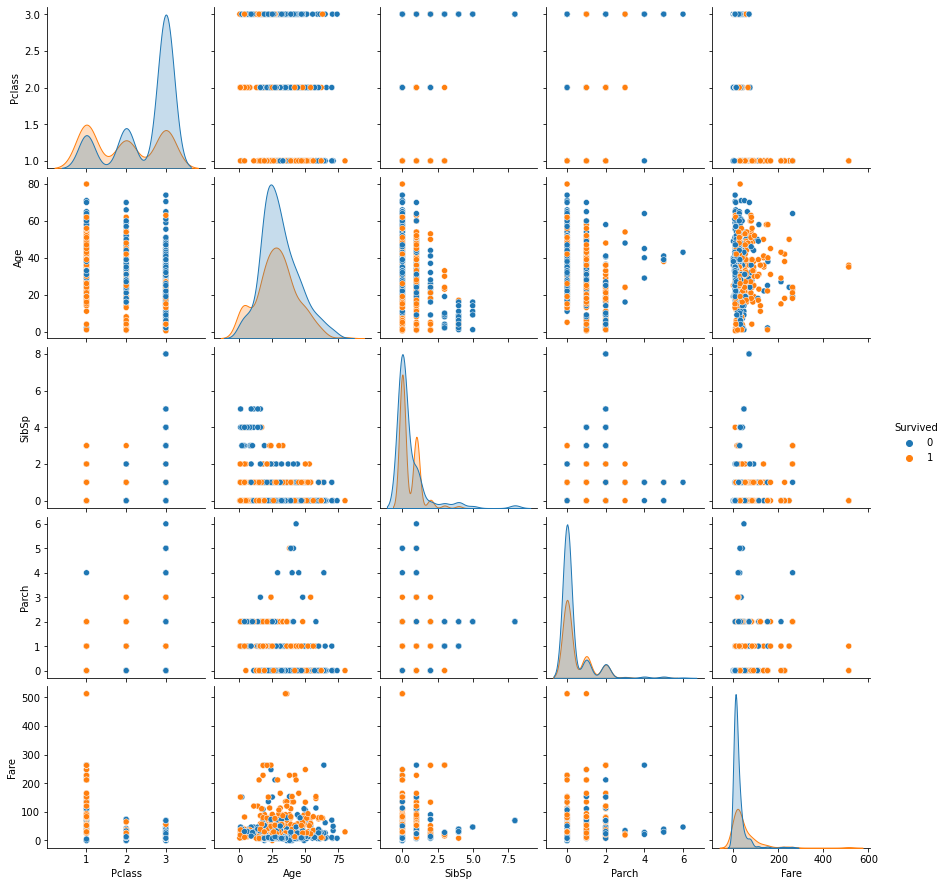

In [28]:
sns.pairplot(df2, hue='Survived')

# Analysis

## 통계 그룹핑 방법

In [29]:
# grouped = df.groupby(['Age','Sex','Fare','Pclass'])['Survived'].sum().reset_index()
grouped = df.groupby(['Sex','Pclass'])['Survived'].sum().reset_index()
grouped

,Sex,Pclass,Survived
0,female,1,91
1,female,2,70
2,female,3,72
3,male,1,45
4,male,2,17
5,male,3,47


## 생존율과의 연관성 찾기

In [30]:
train_df = df.copy()

In [31]:
plt.rcParams["figure.figsize"] = (20,10)
plt.rcParams['axes.grid'] = True 

def bar_chart(feature):
    survived = train_df[train_df['Survived']==1][feature].value_counts()
    dead = train_df[train_df['Survived']==0][feature].value_counts()
    df = pd.DataFrame([survived,dead])
    df.index = ['survived','dead']
    df.plot(kind='bar',stacked=True)

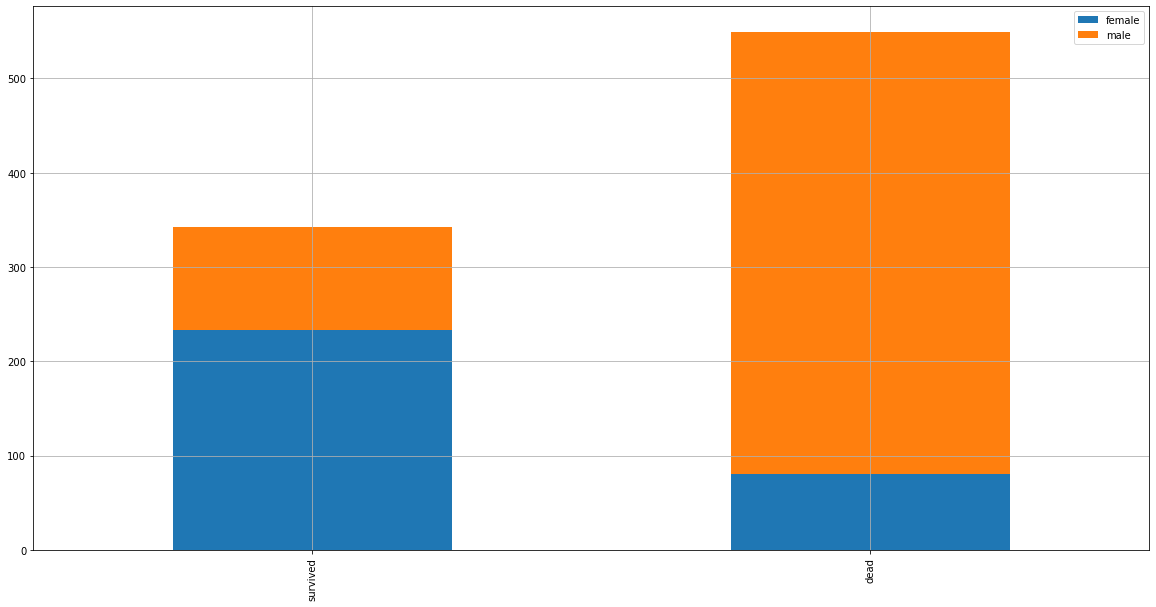

In [32]:
bar_chart('Sex')

In [33]:
train_df.loc[train_df['Age']<=20, 'age']=0
train_df.loc[(train_df['Age']<=40)&(train_df['age']>20), 'age']=1
train_df.loc[(train_df['Age']<=60)&(train_df['age']>40), 'age']=2
train_df.loc[(train_df['Age']<=80)&(train_df['age']>60), 'age']=3
train_df.loc[train_df['Age']>80, 'age']=4

In [34]:
train_df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked', 'age'],
      dtype='object')

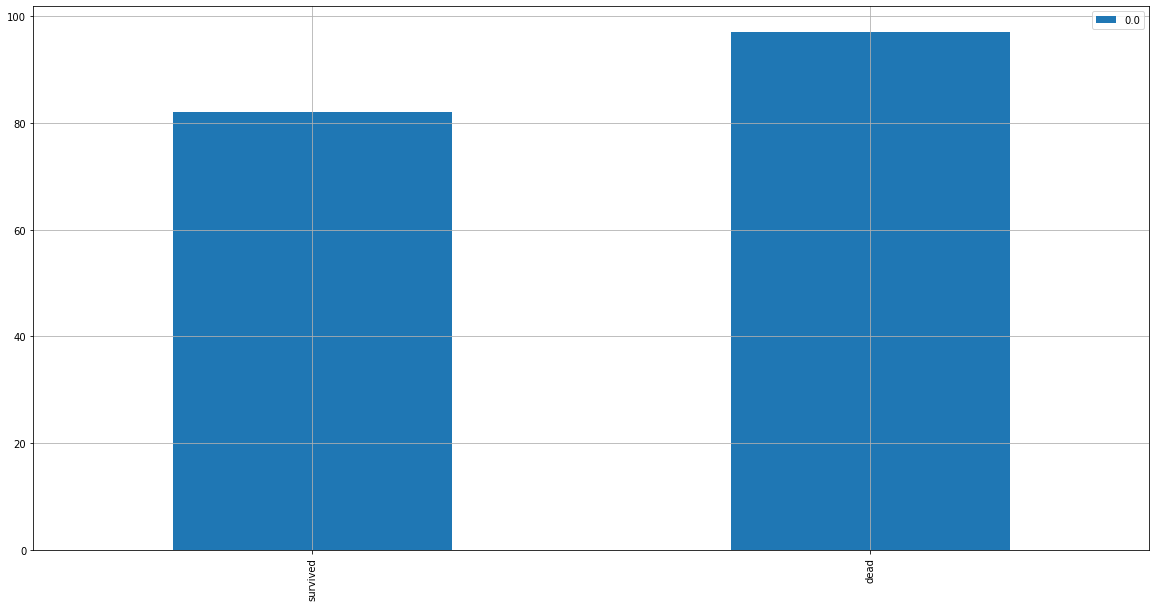

In [35]:
plt.rcParams["figure.figsize"] = (20,10)
bar_chart('age')

In [36]:
#문자 데이터의 숫자 변환
train_df.loc[train_df['Embarked']=='S', 'embarked']=1
train_df.loc[train_df['Embarked']=='C', 'embarked']=2
train_df.loc[train_df['Embarked']=='Q', 'embarked']=3

#동승자 데이터 2열을 합함
train_df['family']=train_df['SibSp']+train_df['Parch']
train_df=train_df.drop(['SibSp','Parch'], axis=1)

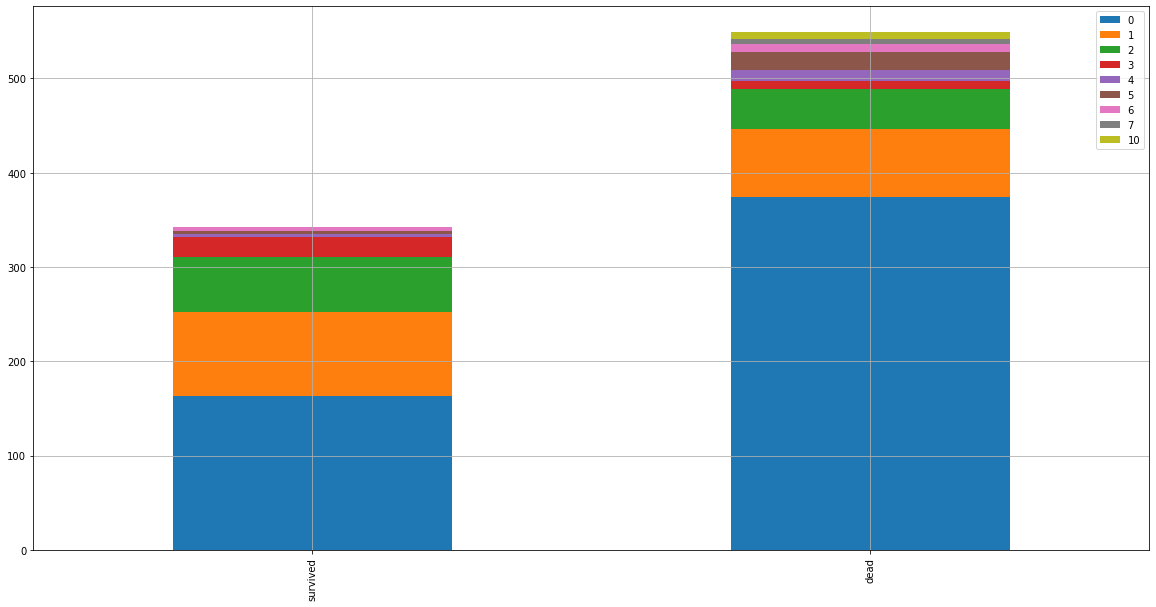

In [37]:
plt.rcParams["figure.figsize"] = (20,10)
bar_chart('family')

# 상관관계분석 

In [38]:
train_df.corr(method='pearson')

,PassengerId,Survived,Pclass,Age,Fare,age,embarked,family
PassengerId,1.000000,-0.005007,-0.035144,0.036847,0.012658,NaN,-0.030555,-0.040143
Survived,-0.005007,1.000000,-0.338481,-0.077221,0.257307,NaN,0.108669,0.016639
Pclass,-0.035144,-0.338481,1.000000,-0.369226,-0.549500,NaN,0.043835,0.065997
Age,0.036847,-0.077221,-0.369226,1.000000,0.096067,NaN,0.012186,-0.301914
Fare,0.012658,0.257307,-0.549500,0.096067,1.000000,NaN,0.063462,0.217138
age,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
embarked,-0.030555,0.108669,0.043835,0.012186,0.063462,NaN,1.000000,-0.081057
family,-0.040143,0.016639,0.065997,-0.301914,0.217138,NaN,-0.081057,1.000000


<AxesSubplot:>

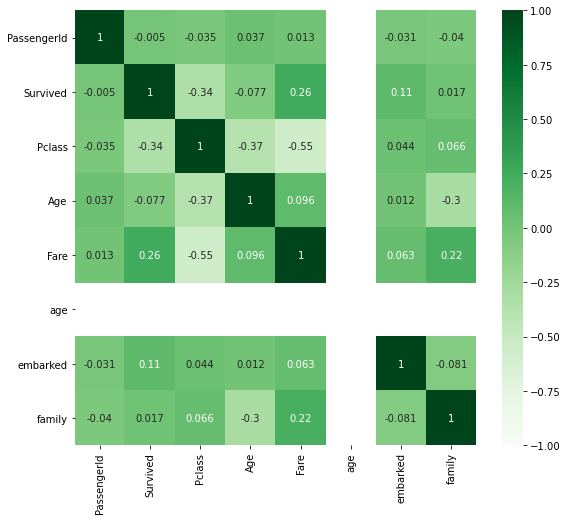

In [39]:
#heatmap으로 상관관계를 표시
plt.figure(figsize = (9 , 8))

import seaborn as sb
plt.rcParams["figure.figsize"] = (5,5)
sb.heatmap(train_df.corr(),
           annot = True, #실제 값 화면에 나타내기
           cmap = 'Greens', #색상
           vmin = -1, vmax=1 , #컬러차트 영역 -1 ~ +1
          )

# 머신러닝으로 의미 찾아보기

In [40]:
from sklearn.model_selection import train_test_split
import statsmodels.api as sm 

y = df['Survived']
X = df[['SibSp','Parch','Fare']]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1234)

model = sm.OLS(y_train, X_train)
model = model.fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:               Survived   R-squared (uncentered):                   0.287
Model:                            OLS   Adj. R-squared (uncentered):              0.284
Method:                 Least Squares   F-statistic:                              95.27
Date:                Tue, 19 Jul 2022   Prob (F-statistic):                    8.21e-52
Time:                        06:32:48   Log-Likelihood:                         -547.14
No. Observations:                 712   AIC:                                      1100.
Df Residuals:                     709   BIC:                                      1114.
Df Model:                           3                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
SibSp          0.0008      0.019      0.042      0.967      -0.037       0.039
Parch          0.0955      0.026      3.713      0.000       0.045       0.146
Fare           0.0048      0.000     13.270      0.000       0.004       0.006
==============================================================================
Omnibus:                       17.227   Durbin-Watson:                   1.821
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               11.678
Skew:                           0.186   Prob(JB):                      0.00291
Kurtosis:                       2.495   Cond. No.                         85.3
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

# Insight 요약

- 여성과 어린 아이들은 생존 가능성이 높다